In [1]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

1/11 - changed to use Gaussian normal distribution to generate random points

In [2]:
def generate_point_clouds(m,n, clusters = 2, cluster_size = 10, eps=[.1]):
    point_clouds = []
    labels = []
    sz = cluster_size*len(eps)-(len(eps)-1)
    for c in range(clusters):
        point_clouds.append(np.linalg.qr(np.random.random((m,n))*2-1)[0])
        labels.append(c)
        for e in eps:
            for i in range(cluster_size-1):
                point_clouds.append(np.linalg.qr(point_clouds[c*sz]+e*np.random.randn(m,n))[0])
                labels.append(c)
    return point_clouds, labels
    

Testing point clouds on Grassmannians generated using several epsilon values:

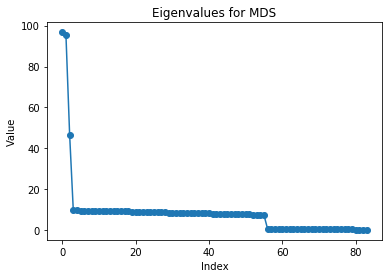

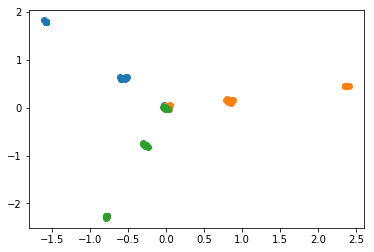

In [3]:
data, labels = generate_point_clouds(200,20,clusters=3, eps=[.01, .1, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Starting with Gr(20,200). Each ball ends up with three distinct clusters, one for each epsilon value. Below shows the balls generated using only $\epsilon = 0.1$

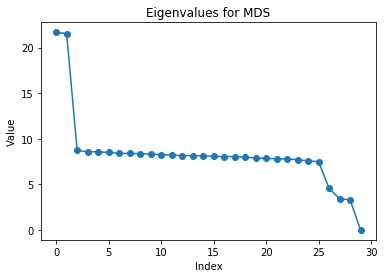

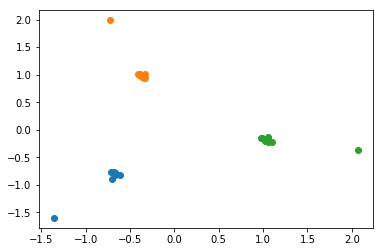

In [4]:
data, labels = generate_point_clouds(200,20,clusters=3, eps=[.1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

The center point used to generate each cluster sits alone farthest from the center. The separation of the center point from the cluster varies with epsilon, with $\epsilon = 0.01$ points nearly indistiguishable from the center in MDS embeddings, and $\epsilon = 1$ points clustered together in the center (as seen in original figure).

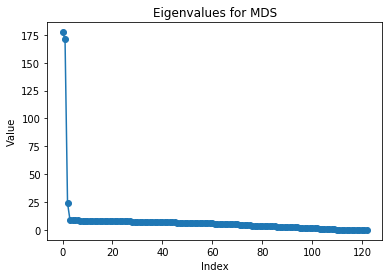

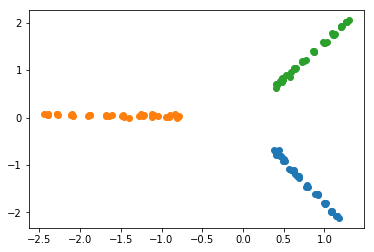

In [5]:
data, labels = generate_point_clouds(200,20,clusters=3, cluster_size = 5, eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Above clusters generated using a sequence of epsilon values from $\epsilon =0.01$ to $0.1$ Again, the "centers" for each clusster are farthest from the center of the embedded figure.

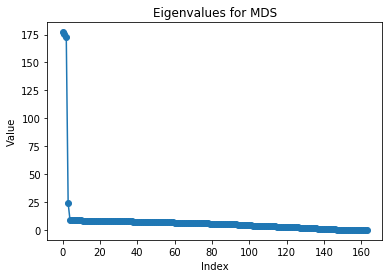

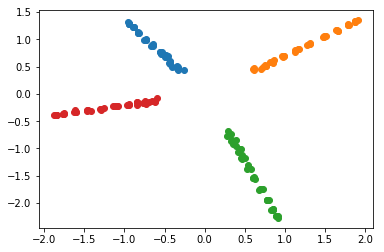

In [3]:
data, labels = generate_point_clouds(200,20,clusters=4, cluster_size = 5, eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Same as previous, but with 4 clusters

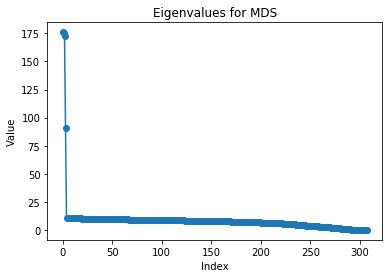

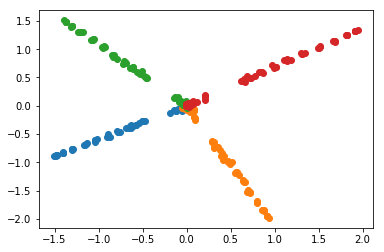

In [4]:
data, labels = generate_point_clouds(200,20,clusters=4, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Extending the $\epsilon$ values all the way to $1$ yields clusters that overlap at their outer edges - which embeds as the center of the figure.

Epoch 1 cluster distortion: 3603.83791656
Kmeans terminated after 1 iterations 

Final cluster distortion: 3603.8379


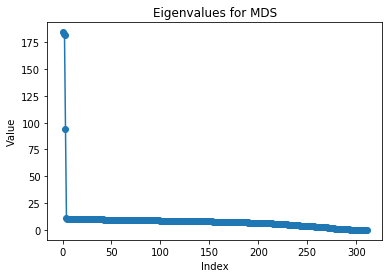

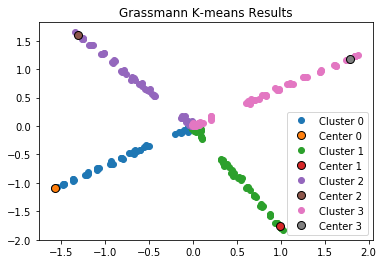

([array([[-0.01553386, -0.06737651, -0.01543067, ...,  0.03818161,
           0.03364529,  0.01800384],
         [-0.0344333 , -0.02104383,  0.01767182, ..., -0.0028535 ,
           0.17605095,  0.1155741 ],
         [-0.07859321,  0.1144698 , -0.01467242, ...,  0.14462336,
           0.04620052, -0.08564288],
         ...,
         [-0.02173706, -0.01795532, -0.14520013, ..., -0.04664287,
          -0.05528994,  0.00225262],
         [ 0.04630436, -0.10914366, -0.0686045 , ..., -0.0265685 ,
          -0.12408848, -0.1051712 ],
         [ 0.00799545, -0.02234177,  0.1251043 , ...,  0.10515706,
          -0.03181497,  0.04217202]]),
  array([[-0.08214365, -0.02284612, -0.03540228, ...,  0.01466344,
          -0.06244046, -0.03545663],
         [-0.02750918, -0.01177863, -0.09801913, ..., -0.00038238,
           0.01060039,  0.04991971],
         [-0.12252432,  0.07635887,  0.00063612, ..., -0.07797107,
          -0.01683941, -0.06698893],
         ...,
         [ 0.0239909 ,  0.07325905

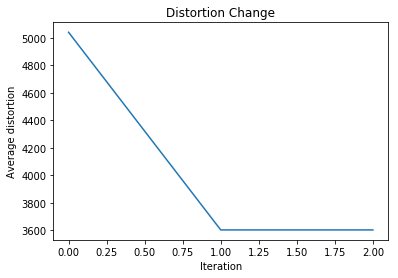

In [8]:
g = gr_kmeans.gr_kmeans()
g.fit(data, center_count=4, plot_results = True, eigplot=True, show_cluster_data=False)

Iteration 1 cluster distortion: 3573.54311886
Iteration 2 cluster distortion: 3550.50293385
Iteration 3 cluster distortion: 3549.59901335
Iteration 4 cluster distortion: 3549.33277497
Iteration 5 cluster distortion: 3549.33277497
LBG terminated after 5 iterations 

Final cluster distortion: 3549.3328


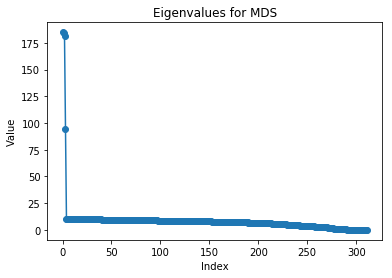

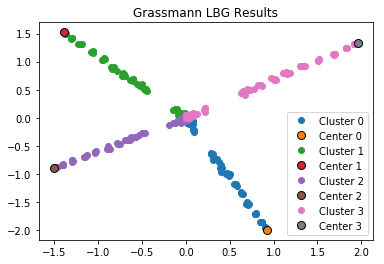

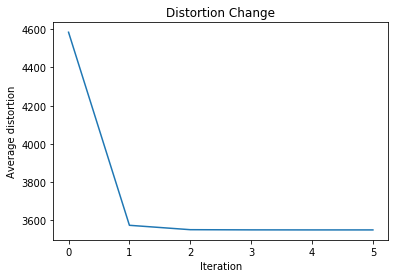

In [9]:
g = gr_lbg.gr_lbg()
c = g.fit(data, center_count=4, plot_results = True, eigplot=True, show_cluster_data=False)

Grassmann LBG run on the data from the previous figure. The points used to generate each cluster are correctly identified. Clusters are separated correctly everywhere but the area where they overlap.

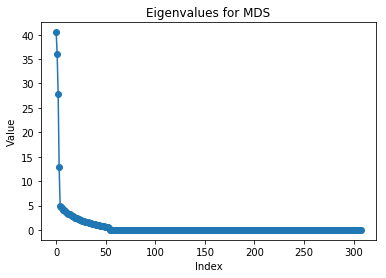

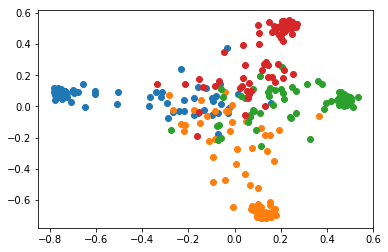

In [9]:
data, labels = generate_point_clouds(10,2,clusters=4, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

The same test done on four clusters in a lower dimensional Grassmannian, Gr(2,10). Same sort of pattern but with more spread. Orange and red points are split more in the third dimension making the overall shape a tetrahedron.

Kmeans terminated after 11 iterations 



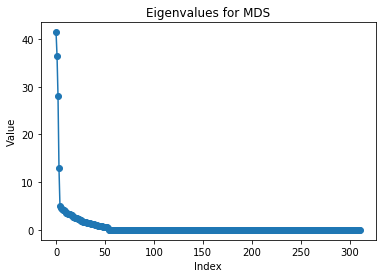

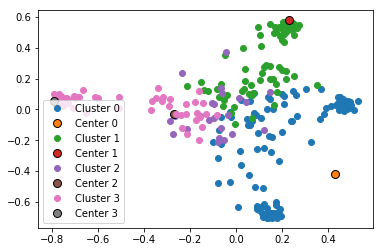

In [10]:
g = gr_kmeans.gr_kmeans()
g.fit(data, center_count=4, plot_results = True, eigplot=True)

LBG on the lower dimensional data set. Centers again selected near the "end" of each embedded point cloud, where the initial point used to generate them sits. Again, all points except those near the overlap region are correctly identified (close inspection shows that almost all red points are assigned to the green cluster, and almost all orange points assigned to the blue cluster).

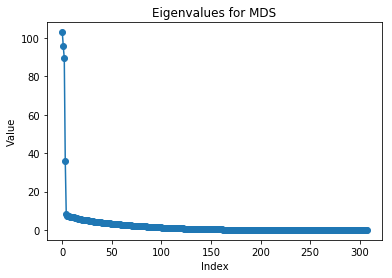

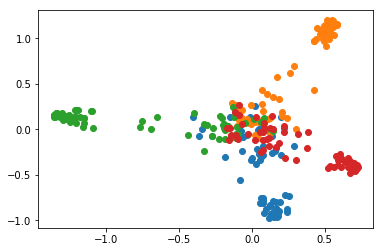

In [11]:
data, labels = generate_point_clouds(20,10,clusters=4, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Same idea as above, but in Gr(10,20)

Kmeans terminated after 11 iterations 



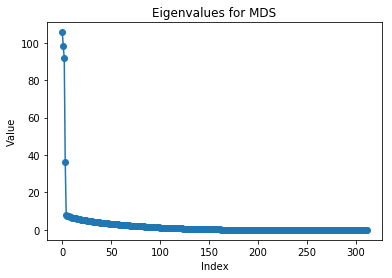

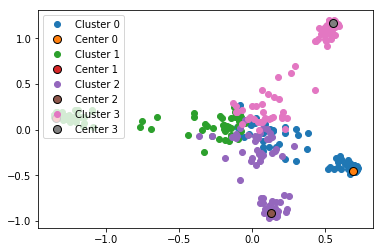

In [12]:
g = gr_kmeans.gr_kmeans()
g.fit(data, center_count=4, plot_results = True, eigplot=True)

Again centers are at the end of each cluster in the embedded image.

So when embedding points from a grassmannian, the center of a point cloud will show up at the edge, with the rest of the points scattering away in a parabolic shape. The thickness of the parabola depends on the dimension of the manifold. A cluster of points on a high dimensional Grassmannian will look close to linear in the embedding, with the center at the end of the line.

To be extra sure this is the case, I did a few more embeddings using only one cluster at a time and varying the dimension.  I anticipated that the same pattern would hold, with maybe a bit more spreading seen in the absence of extra clusters.

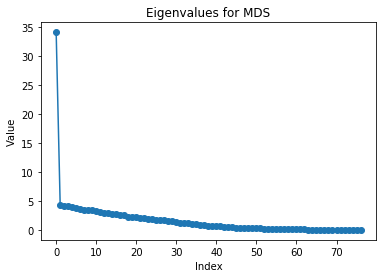

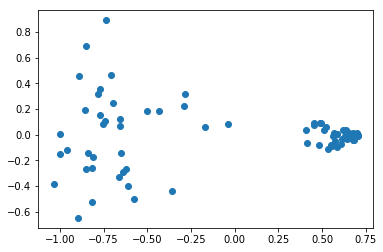

In [13]:
data, labels = generate_point_clouds(20,10,clusters=1, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Kmeans terminated after 11 iterations 



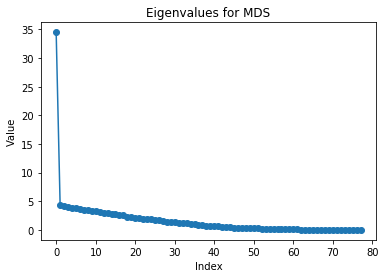

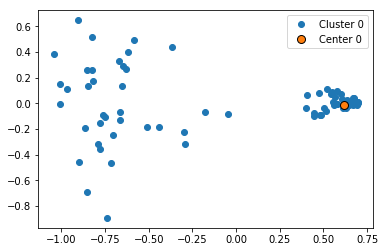

In [14]:
g = gr_kmeans.gr_kmeans()
g.fit(data, center_count=1, plot_results = True, eigplot=True)

One cluster in Gr(10,20). MDS eigenvalues indicate that the cluster is essentially one dimensional.

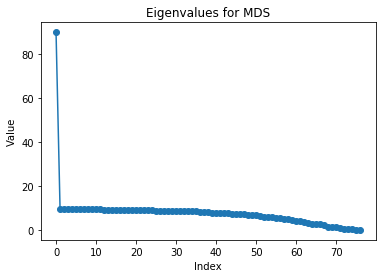

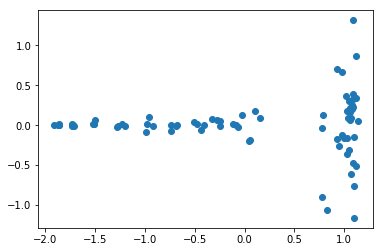

In [15]:
data, labels = generate_point_clouds(200,20,clusters=1, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Kmeans terminated after 11 iterations 



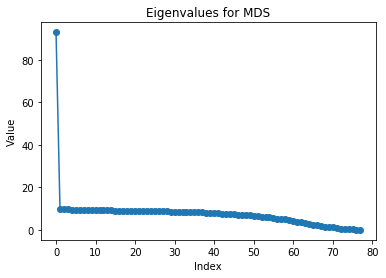

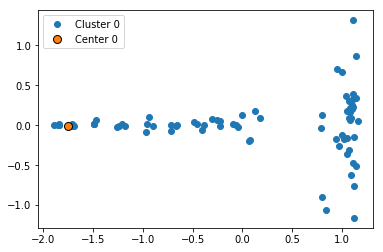

In [16]:
g = gr_kmeans.gr_kmeans()
g.fit(data, center_count=1, plot_results = True, eigplot=True)

One cluster in Gr(20,200). The embedding shows an odd triangular pattern, but the MDS eigenvalues indicate that the data is essentially one dimensional, and projecting onto the x axis would give the expected result. 

It is interesting to me that changing the epsilon value in these higher dimensional spaces has a much, much bigger impact on the embedding distances. In the previous Gr(1,3) case, even a large epsilon of $0.5$ made a well connected cluster, but in higher dimensions large epsilons give a bunch of points that cluster together away from the center.  I think about it like starting at the point of a needle and tracing two different paths down the side, and it doesn't take much for points on the two paths to be much closer to each other than to the starting point.